<a href="https://colab.research.google.com/github/Kushan1001/Hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis(Compiled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up

In [1]:
# Importing the libs

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

# set some display options:

pd.set_option("display.max_columns", 36)
plt.style.use('ggplot')


In [2]:
# Loading the data
hotel_df = pd.read_csv('Hotel Bookings.csv')

# Getting a glance of the pandas dataframe

In [3]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
hotel_df.size

3820480

In [6]:
hotel_df.shape

(119390, 32)

In [7]:
# Getting a glance of the pandas dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Cleaning**

In [8]:
# checking percentage of null values in the dataframe
hotel_df.isnull().sum()/len(hotel_df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

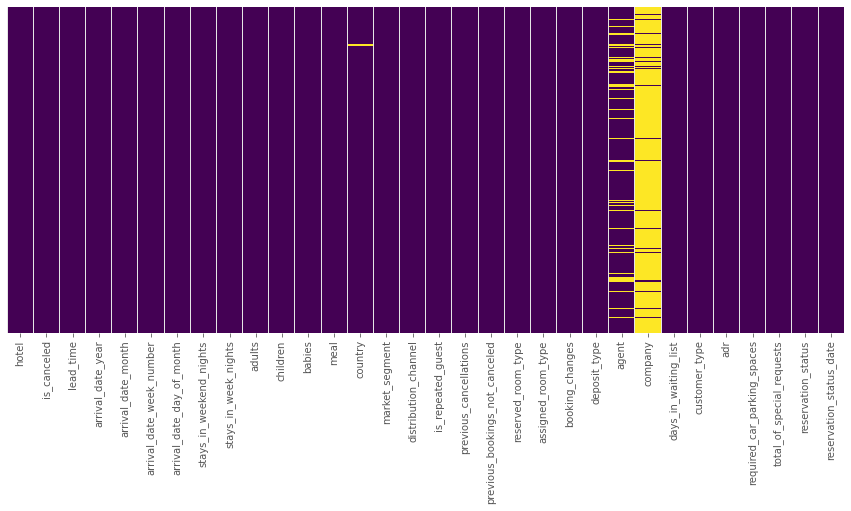

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(hotel_df.isna(),yticklabels=False,cbar=False,cmap='viridis');

In [10]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

In [11]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [12]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [13]:
# filling NA values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

In [14]:
#getting statistics of the data 
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Checking for outliers

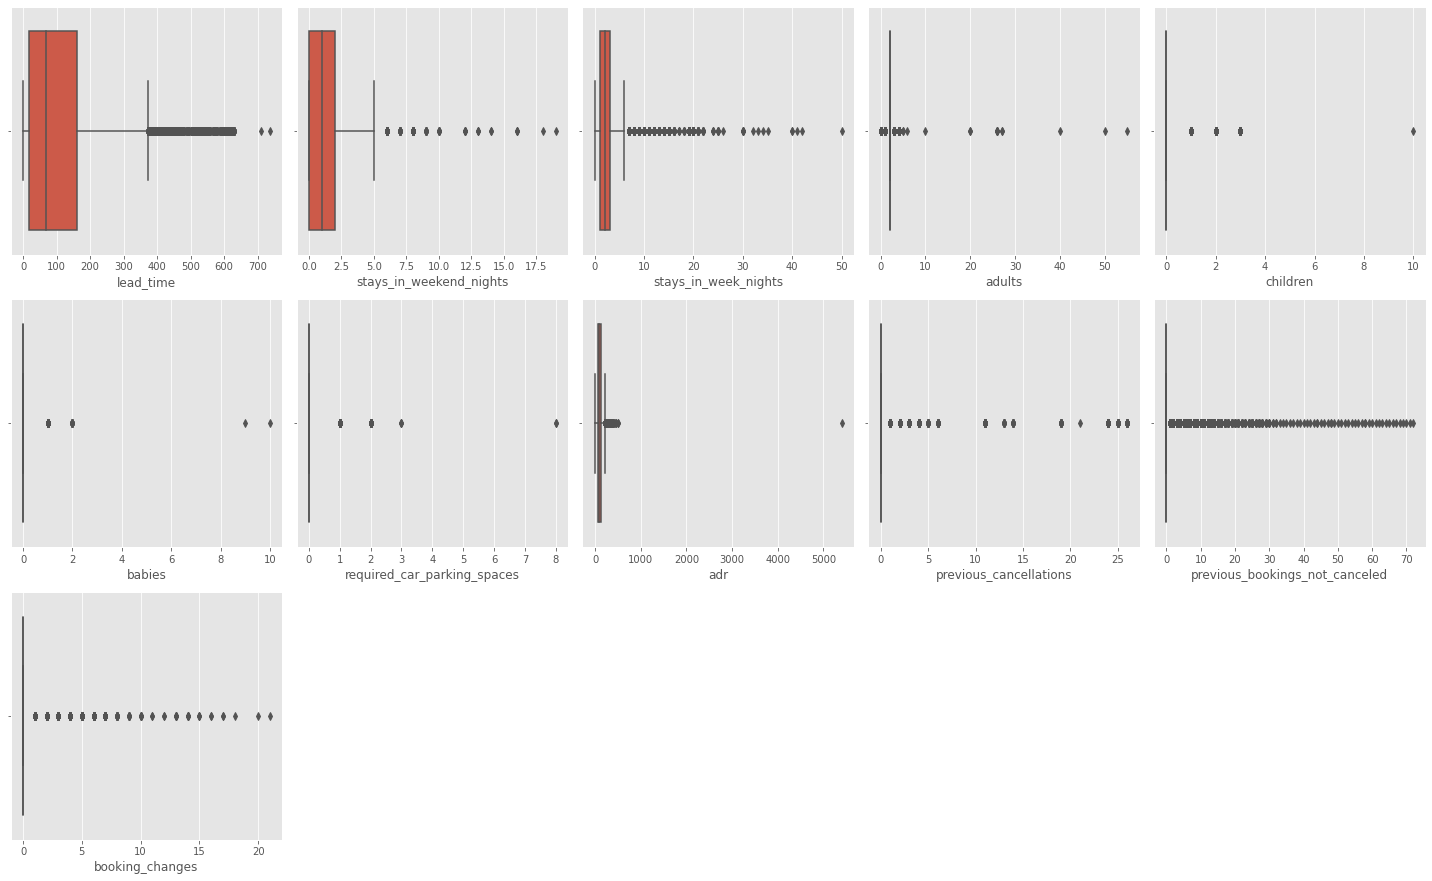

In [15]:
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize = (20,20))

for elem in list_of_columns:
  plt.subplot(5,5,n)
  n = n+1
  sns.boxplot(hotel_df[elem])
  plt.tight_layout()

In [16]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


### **Now our data looks clean. Let's start with  data visualisation.**

# **Which group of adults(with children/without children) have the most speical requests**





In [17]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 

def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return ('with children')
  else:
    return ('without children')

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)

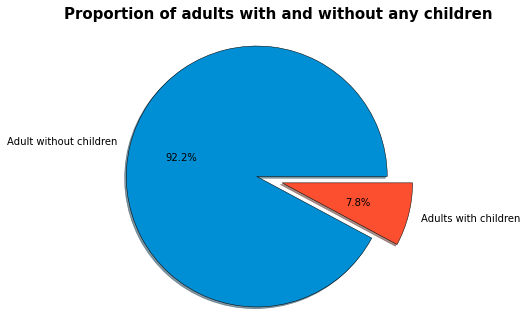

<Figure size 1440x1440 with 0 Axes>

In [18]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']

plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')

plt.title('Proportion of adults with and without any children', fontweight = 'bold', fontsize = 15 ,x = 0.6, y = 1.2)

plt.figure(figsize = (20,20))

plt.tight_layout()

Text(0, 0.5, 'Number of special requests')

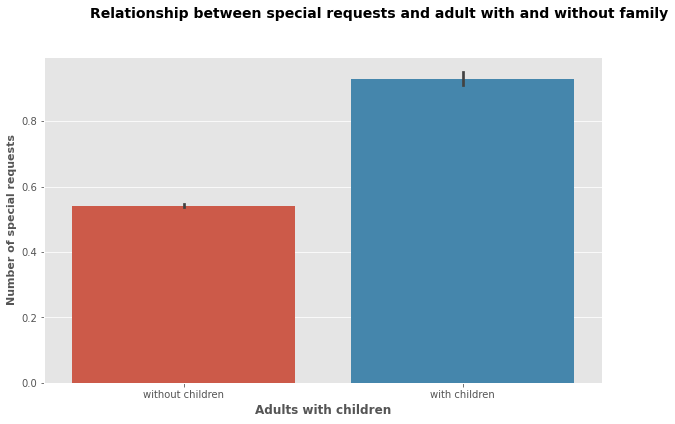

In [19]:
#checking which group of adults has the more speical requests
plt.figure(figsize=(10,6))
bar_chart = (sns.barplot(data = hotel_df, x = 'adults_with_children', y = 'total_of_special_requests')
            .set_title('Relationship between special requests and adult with and without family', fontweight = 'bold' ,size = 14, x= 0.6, y= 1.1))

plt.xlabel('Adults with children', fontweight = 'bold', size = 12)
plt.ylabel('Number of special requests', fontweight = 'bold', size = 11)


It is evident from the piechart that almost 90% of adults prefer to travel without any children and only 10% of adults prefer to travel with family. Moreover, adults who travel without any children have the most special requests.

# **Cancellations over the different months**

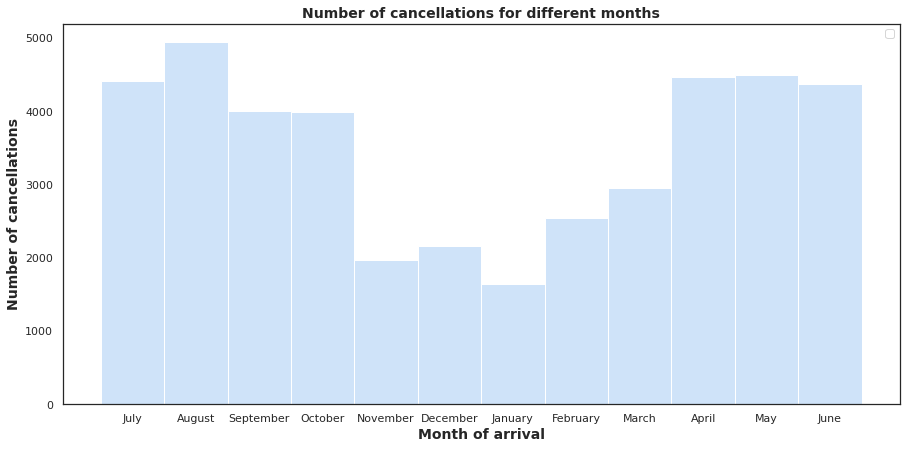

In [20]:
#number of cancellations for different months

no_of_cancellations = hotel_df.loc[hotel_df['is_canceled'] == 1, :]

sns.set(style = 'white')

plt.figure(figsize = (15,7))
histogram_plot = sns.histplot(data = no_of_cancellations , x = 'arrival_date_month', hue = 'is_canceled' , palette = 'pastel')

plt.title('Number of cancellations for different months', fontweight = 'bold',size = 14)
plt.xlabel('Month of arrival',size = 14, fontweight = 'bold')
plt.ylabel('Number of cancellations',size = 14 , fontweight = 'bold')

plt.legend([]);

### **Insights**

1.   Over the year, summer months(April-August) experienced the highest number of cancellations 
2.   However, the winter months(November-January) had the least cancellations







# **Are cancellation rates related with the lead time?**

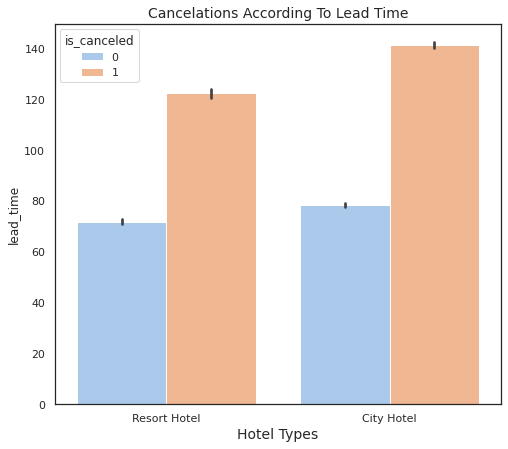

In [21]:
# connection between lead time and number of cancellations

plt.figure(figsize = (8,7))

cancelations_according_to_lead_time = hotel_df.loc[ : , ['hotel','is_canceled','lead_time']]

sns.barplot(data = cancelations_according_to_lead_time, x = 'hotel', y = 'lead_time', hue = 'is_canceled', palette= 'pastel').set_title('Cancelations According To Lead Time', size = 14)
plt.xlabel('Hotel Types', size = 14);

### **Insights**

1.   It can be seen from the graph that irrespective of the hotel type customer generally cancel their bookings with high lead time.
2.  Moreover, it also become evident that if the lead time crosses 80-82 days then, the customer is bound to cancel their booking.



#  **Relationship between deposit type and cancellations**

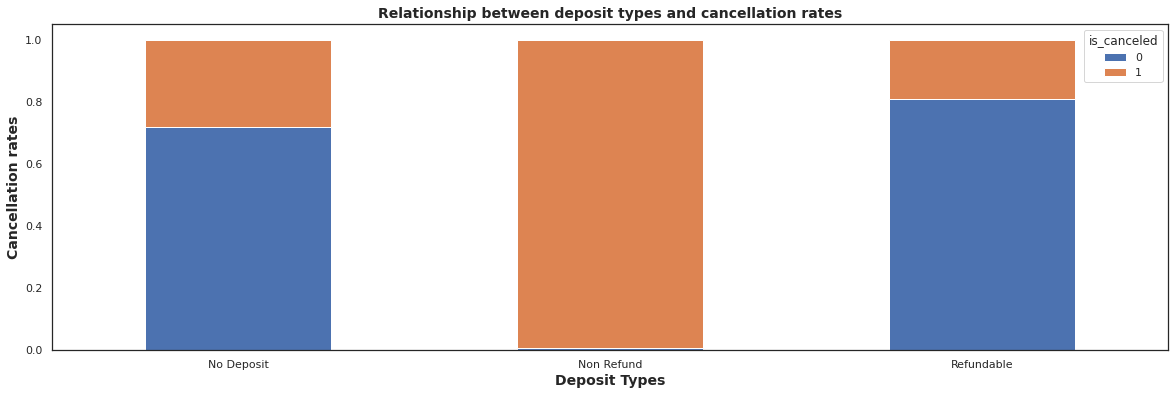

In [22]:
deposit_cancelltion_barplot = hotel_df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(stacked=True,figsize = (20,6))

plt.xlabel('Deposit Types', size = 14, fontweight = 'bold')
plt.ylabel('Cancellation rates', size = 14, fontweight = 'bold')
plt.xticks(rotation = 360)

plt.title('Relationship between deposit types and cancellation rates', size = 14, fontweight = 'bold');


**Insights**

1.   First of all, customers who have paid non-refundable deposit, most of them are bound their booking.
2.   Secondly, customers have paid either no deposit or refundable deposit are likely to not cancel their booking as comapared to customers who have paid non-refundable deposit.




# **ADR over the months**

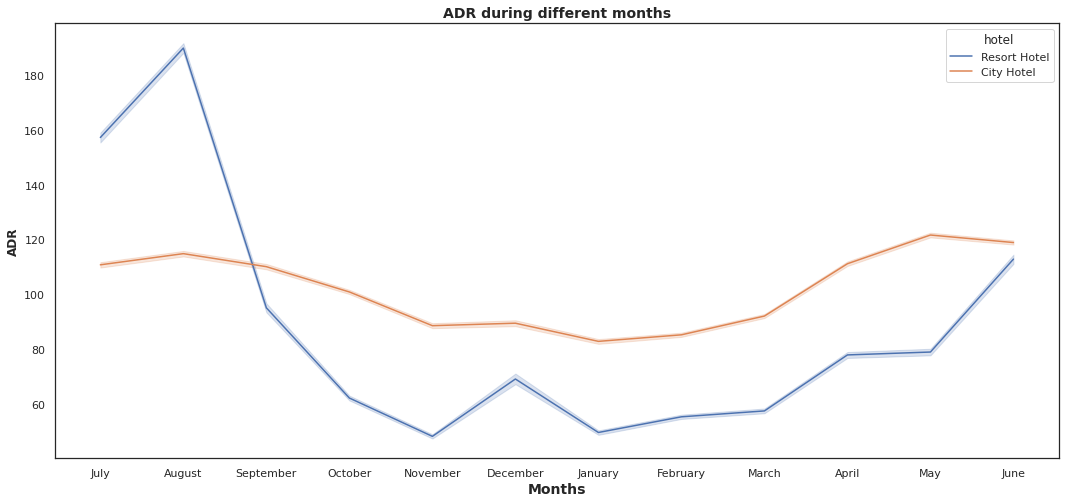

In [23]:
plt.figure(figsize = (18,8))

sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('ADR during different months', size = 14,fontweight = 'bold')
plt.xlabel('Months', size = 14, fontweight = 'bold')
plt.ylabel('ADR', fontweight = 'bold');

### **Insights**

1.   ADR was the resort hotel was at its peak during the summer months(May-August) and bottom in months of October-Janaury
2.   On the other hand, for the city hotel ADR was relatively same in all the months and followed the same pattern as the resort hotel.



# **Most revenue generating hotel rooms and which customer group books them**

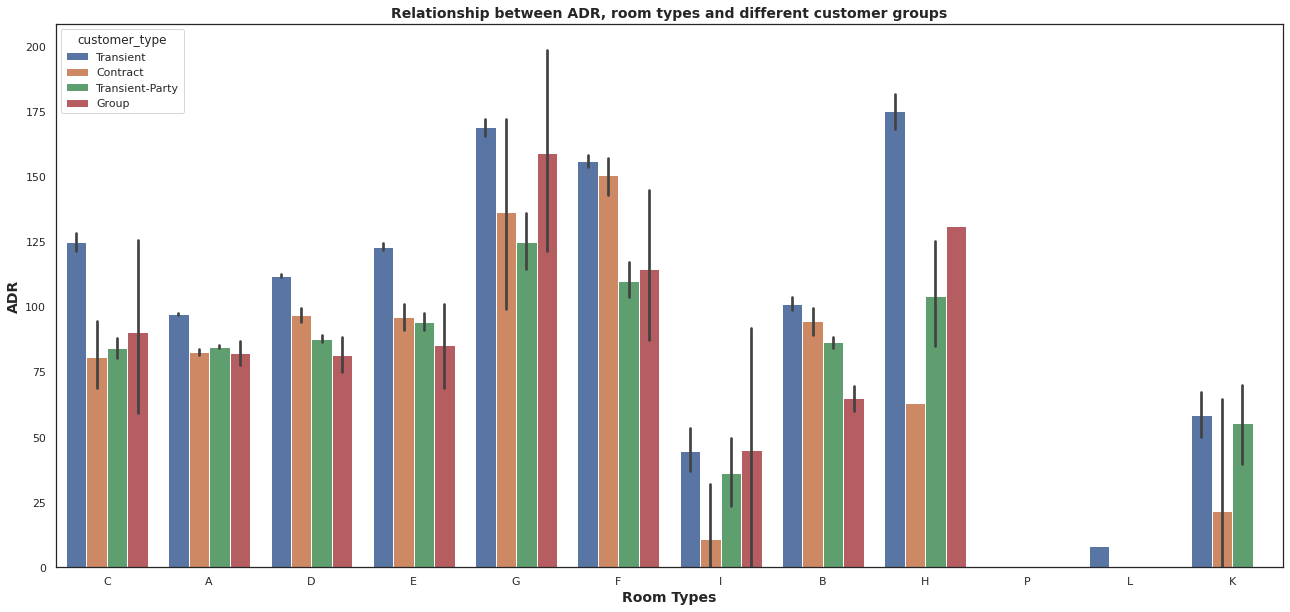

In [24]:
plt.figure(figsize = (22,10))

sns.barplot(data = hotel_df, y = 'adr', x = 'assigned_room_type', hue = 'customer_type')

plt.xlabel('Room Types', fontweight = 'bold', size = 14)
plt.ylabel('ADR',fontweight = 'bold', size = 14)
plt.title('Relationship between ADR, room types and different customer groups',fontweight = 'bold', size = 14);

### **Insights**

1.   It can be seen that, transient customers are the paying the most to stay in the hotel across all room types.
2.   Furthermore, rooms G,F and H are the most profitable rooms.



# **Lead time of each market segment**

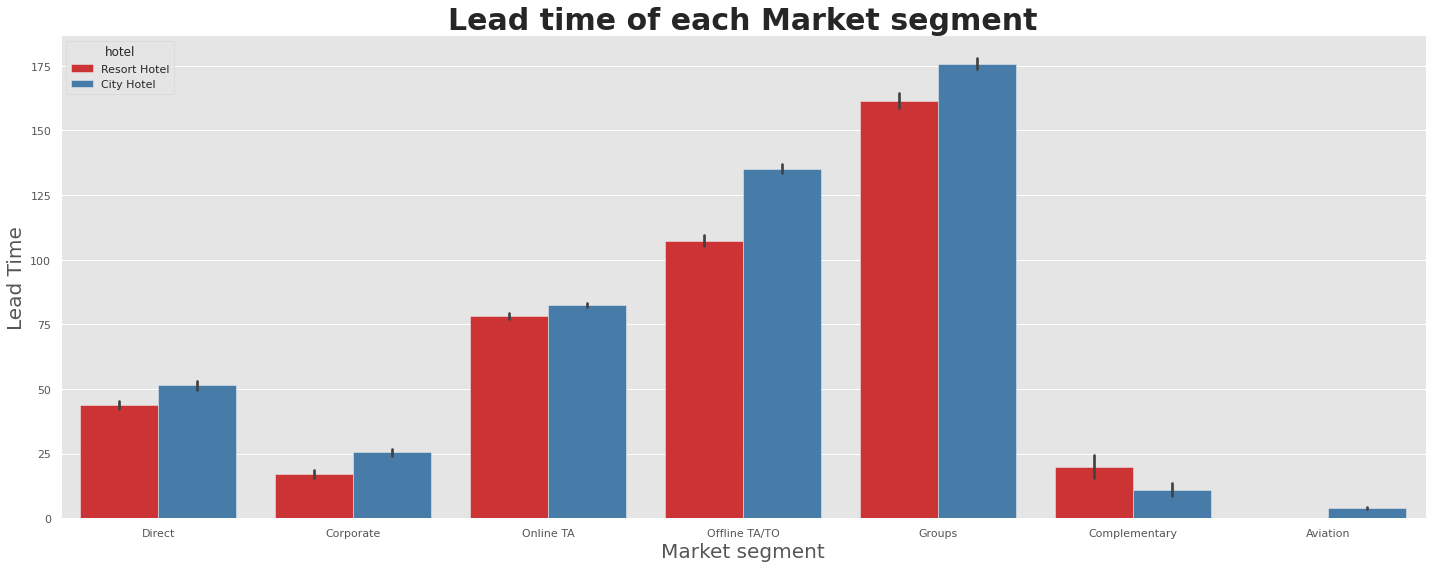

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
sns.barplot(x = "market_segment", y = "lead_time", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('Lead time of each Market segment',fontsize= 30, fontweight='bold');
plt.xlabel('Market segment',fontsize=20)
plt.ylabel('Lead Time',fontsize=20)
plt.tight_layout()



### **Insights**
* It can be see from the graph that Groups have the highest lead time, while aviation has the least lead time.
* It is also notable that aviation sector has least booking in Resort hotel. 


# Number of days at hotel per market segment

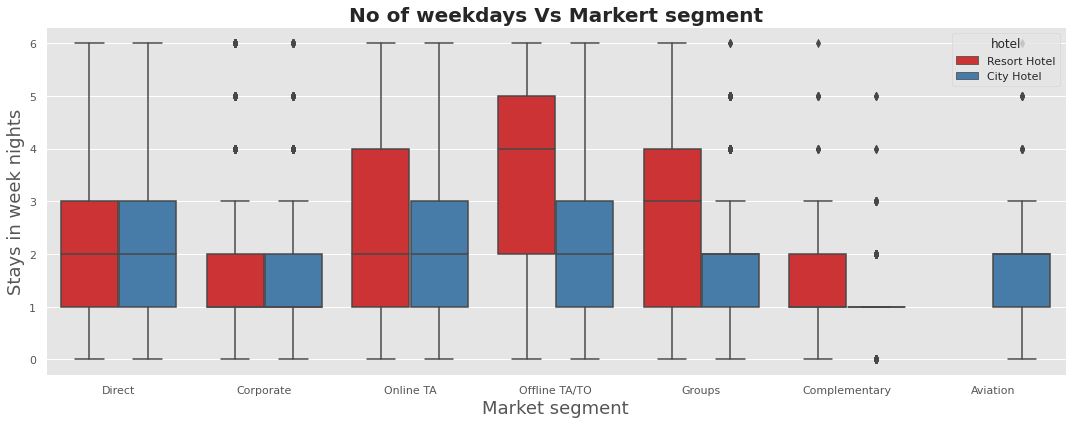

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('No of weekdays Vs Markert segment',fontsize=20,fontweight="bold")
plt.ylabel('Stays in week nights',fontsize=18)
plt.xlabel('Market segment',fontsize=18);
plt.tight_layout()

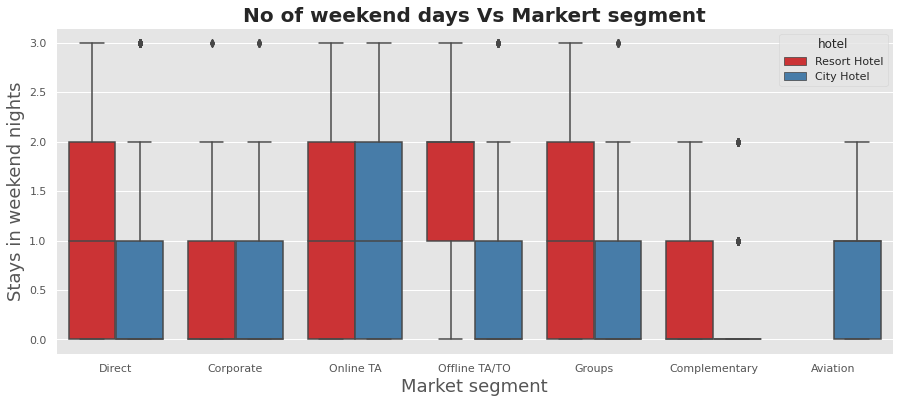

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('No of weekend days Vs Markert segment',fontsize=20,fontweight="bold");
plt.ylabel('Stays in weekend nights',fontsize=18)
plt.xlabel('Market segment',fontsize=18);


### **Insights**

Most people do not seem to prefer to stay at the hotel for more than 1 week.
Customers in the Aviation Segment are likely to arrive shortly due to business.
Customers from Aviation Segment do not seem to be staying at the resort hotels.

# Relation between reserved and assigned room type

### **Insights**

Below crosstable shows if there is any difference between assigned and reserved room types. The results are shown as a percentage. Average 87% of bookings keep their reserved room and the rest of the' rooms have been changed. Every row represents the reserved type and distribution over the columns shows what was the assigned room despite of reserved type.

In [28]:
(hotel_df['reserved_room_type']==hotel_df['assigned_room_type']).value_counts().values[0]/len(hotel_df) *100

87.22505118378918

In [29]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index',margins=True).round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,85.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,7.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,94.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,20.0,20.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,20.0,0.0


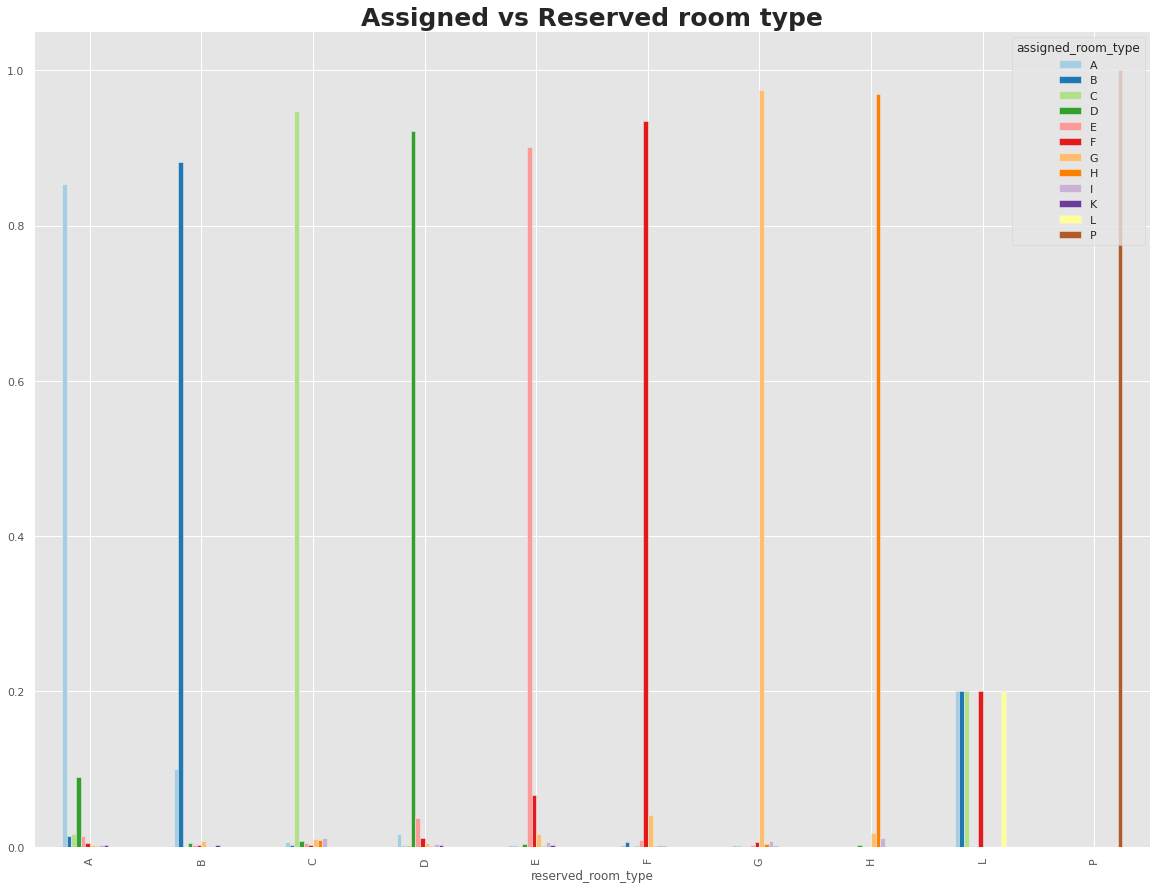

In [30]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index').plot(figsize=(20,15),kind="bar",stacked=False,colormap='Paired')
plt.title('Assigned vs Reserved room type',fontsize=25,fontweight='bold');

Co-relationship between Reserved room type and assigned room type

In [31]:
df = hotel_df.loc[:,['assigned_room_type','reserved_room_type']]
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,assigned_room_type,reserved_room_type
assigned_room_type,1.000000,0.712267
reserved_room_type,0.712267,1.000000


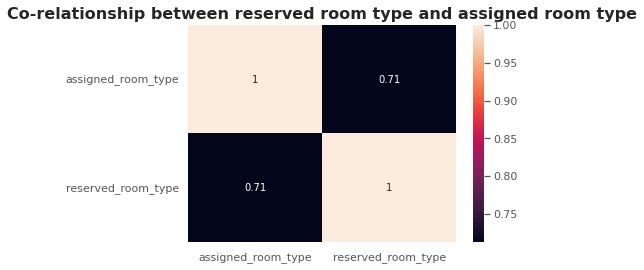

In [32]:
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot= True);
plt.title('Co-relationship between reserved room type and assigned room type',fontsize=16,fontweight ='bold');

# **Number of City Hotels and Resort Hotels**

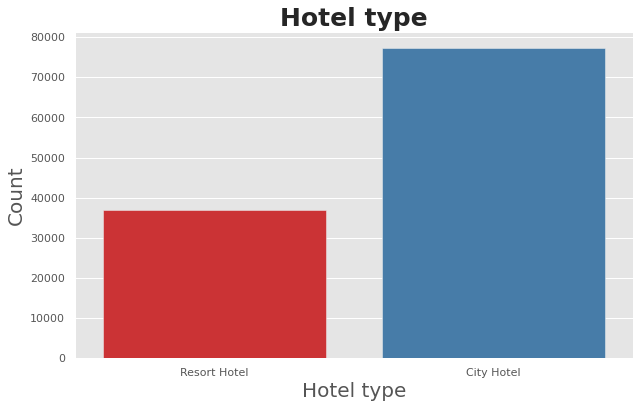

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['hotel'],palette="Set1")
plt.title('Hotel type',fontsize=25,fontweight='bold');
plt.xlabel('Hotel type',fontsize=20);
plt.ylabel('Count',fontsize=20);



### **Insights**

There are more City hotels than Resort hotels the reason could be there is more demand for city hotels.

# Cancelations by repeated Guests

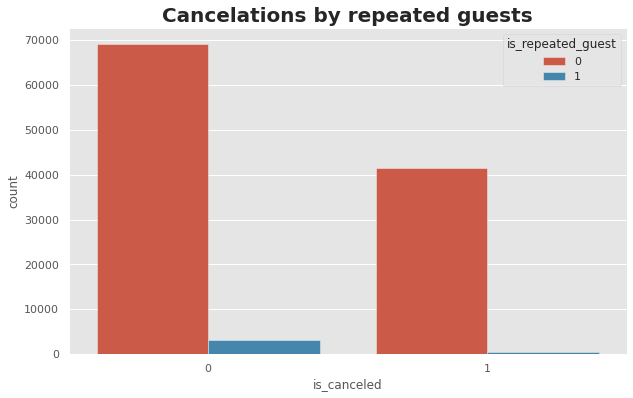

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_df,x='is_canceled',hue='is_repeated_guest')
plt.title('Cancelations by repeated guests',fontsize=20,fontweight='bold');

### **Insights**

Repeated guests cancels the less compared to non repeated guests

# **Cancelations with Special requests**

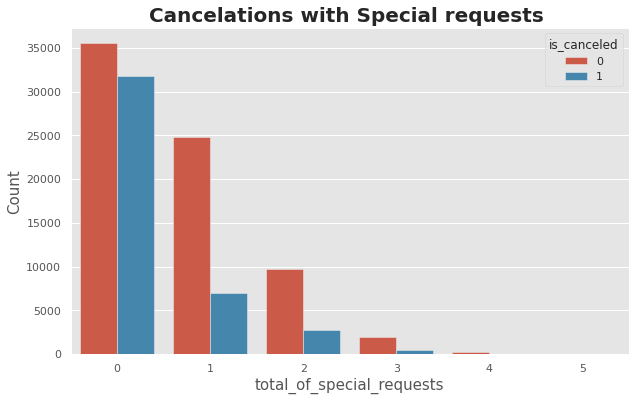

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_df,x='total_of_special_requests',hue='is_canceled')
plt.title('Cancelations with Special requests ',fontsize=20,fontweight='bold');
plt.xlabel('total_of_special_requests',fontsize=15)
plt.ylabel('Count',fontsize=15);


### **Insights**
Guests who have more than 1 or more special requests are less prone to cancel.

# **How likely is the customer about to cancel based on previous booking cancellations**

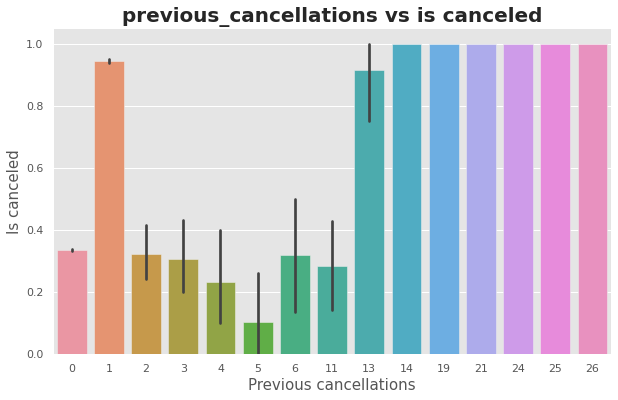

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='previous_cancellations',data=hotel_df,y='is_canceled');
plt.title('previous_cancellations vs is canceled',fontsize=20,fontweight='bold')
plt.xlabel('Previous cancellations',fontsize=15)
plt.ylabel('Is canceled',fontsize=15);


### **Insights**
Guests with more than 11 Previous cancelations have a very high probability to cancel the booking



---



---



# **What are the top countries from which the customers visit**

### **What are the most busiest months?**

### **Which market segment do customer prefer while booking hotel**

### **What are the prices of different room types over the months?**

### **What are the months with highest cancellations**

### **What is the duration of stay of different customer types**

### **What is the most popular meal plan**

In [37]:
df = hotel_df[['meal','customer_type']]
df = df.groupby('meal')['customer_type'].value_counts().unstack()
df.drop(index=['Undefined'],inplace = True)

In [38]:
group_df = df.Group

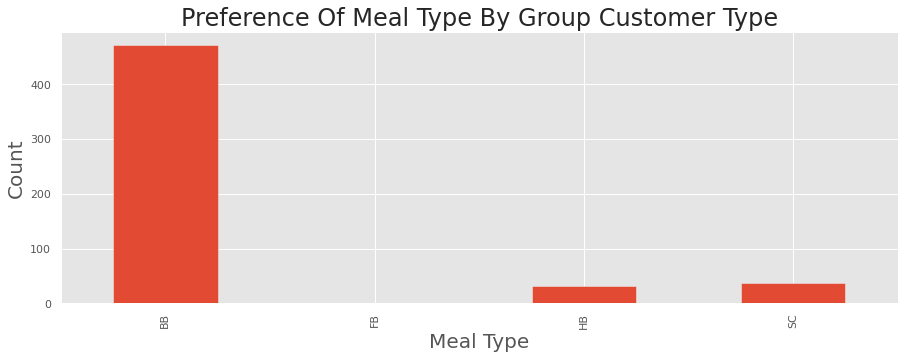

In [39]:
plt.figure(figsize=(15,5))
group_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Group Customer Type",size = 24)
plt.show()

### **Which type of deposit is preferred by customers**

### **Which month is preferred by different customer groups for their stay**

### **What are the months with the highest cancellation rates**

### **Which customer groups has the most special requests**

### **Do adults prefer to travel with children or without them**

### **And if they do they less special requests or more**

### **What is lead time after which customers generally cancel their booking**

### **What is the relationship between different types of deposit and cancellations**

### **What is ADR over the months. And in which months is the ADR at the peak and at the bottom**

### **Which room are generating the most revenue and which customer groups like to stay in them**